#### Business Problem

##### Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

**Dataset Description**

1. Show_id: Unique ID for every Movie / Tv Show
2. Type: Identifier - A Movie or TV Show
3. Title: Title of the Movie / Tv Show
4. Director: Director of the Movie
5. Cast: Actors involved in the movie/show
6. Country: Country where the movie/show was produced
7. Date_added: Date it was added on Netflix
8. Release_year: Actual Release year of the movie/show
9. Rating: TV Rating of the movie/show
10. Duration: Total Duration - in minutes or number of seasons
11. Listed_in: Genre
12. Description: The summary description

## Problem Statement
#### Business Objective:  Which type of shows to produce and how to grow the business
##### Determined by following
1. Understand the Distribution of the Shows (TV Shows/ Movies)
2. Understand the Age group distribution
3. Understand the year on year growth of content per Age group
4. Analyse the popularity of directors (TV Shows and Movies) and Age group
5. Analyse the popularity of casts (TV Shows and Movies) and Age group
6. Analyse the Best duration (TV Shows and Movies) and Age group
7. Analyse the Best time to launch TV Shows and Movies per Age group
8. Analyse the Top geographies

#### Import the relevant libraries

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset

In [2]:
df_netflix_dataset = pd.read_csv('netflix.csv')

#### Data Exploration

In [3]:
df_netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_netflix_dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


#### Print the shape and the columns of the dataset

In [5]:
df_netflix_dataset.shape

(8807, 12)

In [6]:
df_netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##### Observation
1. The dataset consists of 8807 rows and 12 columns
2. It seems the cast, listed_in contains multiple values in single columns
3. All columns seems to be string data type except release year which is integer.
4. Let's verify this below!

#### Print the data type of the columns

In [7]:
df_netflix_dataset.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df_netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### Observation
1. It seems the director, title, release_year, listed_in and description columns have non-null values
2. The director, cast, country, date_added, duration has some null records
3. The data type is object type of all columns except release_year which is expected

#### Let's understand about the missing values in the dataset

In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  # total number of null values
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(
        ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data  # return the dataframe

In [10]:
missing_check(df_netflix_dataset)

,Total,Percent
director,2634,0.299080
country,831,0.094357
cast,825,0.093675
date_added,10,0.001135
rating,4,0.000454
duration,3,0.000341
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


##### Observation
1. The Director column have close to 29.9% missing values
2. The country and cast columns has 9% missing values
3. The date_added, rating and duration has less than 0.001% missing values
4. We can impute the above with different strategies after understanding more about the nature of dataset

#### Let's try to understand about the columns values

**Step 1: Overview of the unique values per column**

In [13]:
df_netflix_dataset.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**Observation**
1. The `show_id`, `title` seems both are unique
2. There seems to be only 2 unique values in the `type` columns
3. There seems to be 748 unique `country` which this dataset is about
4. There is a lot of variation in the `date_added` columns as compared to the `release_year` of the TV Shows and Movies
5. There seems to be only 17 types of `rating`
6. The duration seems to have some grouping as there exists only 220 unique values in the dataset
7. The `listed_in` columns are seems also to be grouped as there are only 514 unique values
8. The `description` is almost unique.

**Step 2: Distribution of the Type of shows**

In [171]:
def plot_pie(list_labels, list_values, col_name):
    colors = sns.color_palette('Set2')
    explode = [0.04 if i % 2 == 0 else 0.08 for i in range(len(list_values))]
    plt.title(f'Distribution of `{col_name}`', fontdict={'fontweight': 'bold', 'fontsize': 20})
    plt.pie(list_values,
            labels=list_labels,
            colors=colors,
            autopct='%.1f%%',
            shadow=True,
            explode=explode)

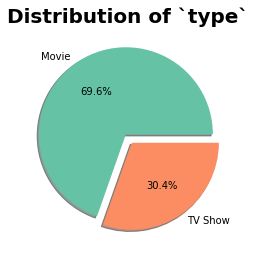

In [172]:
dist_col_type = df_netflix_dataset['type'].value_counts()
plot_pie(dist_col_type.index, dist_col_type.values, 'type')

**Observation**
1. It seems the movies comprises the maximum portion of the dataset with almost 70%
2. It seems the dataset has only 30% TV Shows

**Step 3: Let's see how many columns have multiple values in the columns**

In [84]:
df_col_count = pd.DataFrame()
for col in df_netflix_dataset.columns:
    len_col = max(df_netflix_dataset[col].astype('str').str.split(', ').apply(len))
    frame = pd.DataFrame({f'max_csv_in_{col}': [len_col]})
    df_col_count = pd.concat([df_col_count, frame], axis=1)
df_col_count.T

,0
max_csv_in_show_id,1
max_csv_in_type,1
max_csv_in_title,4
max_csv_in_director,13
max_csv_in_cast,50
max_csv_in_country,12
max_csv_in_date_added,2
max_csv_in_release_year,1
max_csv_in_rating,1
max_csv_in_duration,1


In [85]:
df_col_count = df_col_count.T.reset_index()
df_col_count.columns = ['col_name', 'count']

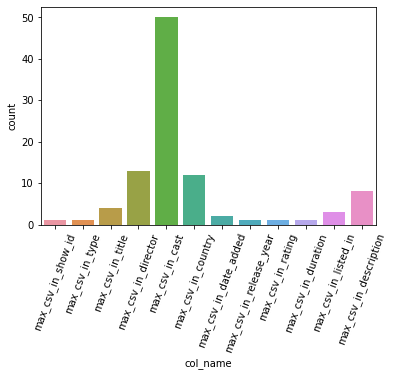

In [86]:
sns.barplot(data=df_col_count, x='col_name', y='count')
plt.xticks(rotation=70)
plt.show()

**Observation**
1. It seems many columns have lots of values which are comma separated.
2. The one which requires to be unnest are `director`, `cast`, `country`, `listed_in`, rest all can be ignored.

In [112]:
def unnest(df, col_name, index_col):
    constraint = df[col_name].apply(lambda x: str(x).split(', ')).tolist()
    df_new = pd.DataFrame(constraint, index=df[index_col])
    df_new = df_new.stack().reset_index()
    df_new = df_new.drop('level_1', axis = 1)
    df_new.columns = [index_col, col_name]
    df_new = df_new.replace({'nan': np.nan})
    df_new = df_new.dropna()
    return pd.DataFrame(df_new)

In [113]:
df_directors_unnest = unnest(df_netflix_dataset, 'director', 'show_id')
df_directors_unnest.head()

,show_id,director
0,s1,Kirsten Johnson
2,s3,Julien Leclercq
5,s6,Mike Flanagan
6,s7,Robert Cullen
7,s7,José Luis Ucha


In [114]:
df_directors_unnest.shape

(6978, 2)

In [115]:
df_cast_unnest = unnest(df_netflix_dataset, 'cast', 'show_id')
df_cast_unnest.head()

,show_id,cast
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
5,s2,Dillon Windvogel


In [116]:
df_country_unnest = unnest(df_netflix_dataset, 'country', 'show_id')
df_country_unnest.head()

,show_id,country
0,s1,United States
1,s2,South Africa
4,s5,India
7,s8,United States
8,s8,Ghana


In [117]:
df_listed_in_unnest = unnest(df_netflix_dataset, 'listed_in', 'show_id')
df_listed_in_unnest.head()

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


In [121]:
df_combined_netflix = pd.merge(df_netflix_dataset.drop('director', axis=1), df_directors_unnest, how='left', on='show_id')
df_combined_netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [124]:
df_combined_netflix = pd.merge(df_combined_netflix.drop('cast', axis=1), df_cast_unnest, how='left', on='show_id')
df_combined_netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,director,cast
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata
2,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema
3,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Gail Mabalane
4,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Thabang Molaba


In [125]:
df_combined_netflix = pd.merge(df_combined_netflix.drop('country', axis=1), df_country_unnest, how='left', on='show_id')
df_combined_netflix.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,director,cast,country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Gail Mabalane,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Thabang Molaba,South Africa


In [126]:
df_combined_netflix = pd.merge(df_combined_netflix.drop('listed_in', axis=1), df_listed_in_unnest, how='left', on='show_id')
df_combined_netflix.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,International TV Shows


In [127]:
df_combined_netflix.shape

(201991, 12)

#### Let's analyse the contents rating distribution (for this we will use the original dataset)

In [133]:
def content_age_group(rating):
    if rating in ['G', 'TV-Y', 'TV-G']:
        return 'Little Kids'
    elif rating in ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']:
        return 'Older Kids'
    elif rating in ['PG-13', 'TV-14']:
        return 'Teens'
    elif rating in ['R', 'NC-17', 'TV-MA', 'NR', 'UR']:
        return 'Mature'
    else:
        return 'Unknown'

In [134]:
df_netflix_dataset['age_group'] = df_netflix_dataset['rating'].apply(content_age_group)
df_netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature


In [132]:
df_netflix_dataset['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

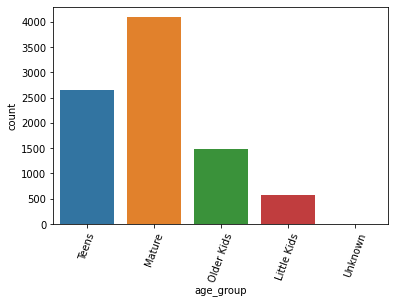

In [139]:
sns.countplot(data=df_netflix_dataset, x = 'age_group')
plt.xticks(rotation=70)
plt.show()

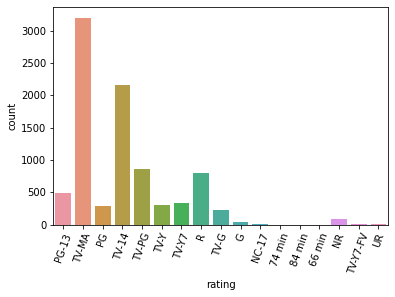

In [140]:
sns.countplot(data=df_netflix_dataset, x = 'rating')
plt.xticks(rotation=70)
plt.show()

##### Observation
1. It seems that Neflix users like to watch Mature content.
2. Teens are the second most targeted age group
3. Third is Older Kids.
4. Last Little kids also can find good number of content on Netflix

#### Let's add the same age group column in the combined dataframe of netflix

In [141]:
df_combined_netflix['age_group'] = df_combined_netflix['rating'].apply(content_age_group)
df_combined_netflix.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in,age_group
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries,Teens
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,International TV Shows,Mature
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Dramas,Mature
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Mysteries,Mature
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,International TV Shows,Mature


#### Let's also analyse the growth in content of the netflix (for this also we'll use the original dataframe)

In [145]:
df_netflix_dataset['date_added_dt'] = pd.to_datetime(df_netflix_dataset['date_added'].str.strip(), format='%B %d, %Y')

In [146]:
df_netflix_dataset['year_added'] = df_netflix_dataset['date_added_dt'].dt.year
df_netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature,2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature,2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature,2021-09-24,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature,2021-09-24,2021.0


In [158]:
df_content_insight_age = df_netflix_dataset.groupby(['year_added', 'age_group']).agg(show_count = ('show_id', 'count')).reset_index()

In [159]:
df_content_insight_age.head()

,year_added,age_group,show_count
0,2008.0,Mature,2
1,2009.0,Mature,2
2,2010.0,Mature,1
3,2011.0,Mature,3
4,2011.0,Older Kids,5


In [152]:
df_year_insight = df_netflix_dataset.groupby(['year_added']).agg(show_count = ('show_id', 'count')).reset_index()

In [153]:
df_year_insight.head()

,year_added,show_count
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3


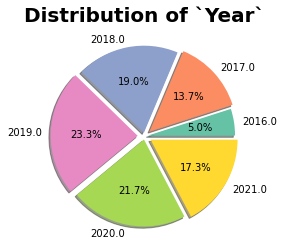

In [175]:
df = df_year_insight[df_year_insight['year_added'] > 2015]
plot_pie(list(df['year_added']), list(df['show_count']), 'Year')

<AxesSubplot:xlabel='year_added', ylabel='show_count'>

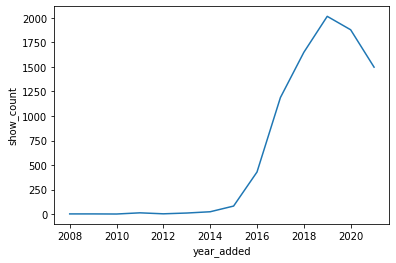

In [157]:
sns.lineplot(data = df_year_insight, x = 'year_added', y = 'show_count')

<AxesSubplot:xlabel='year_added', ylabel='show_count'>

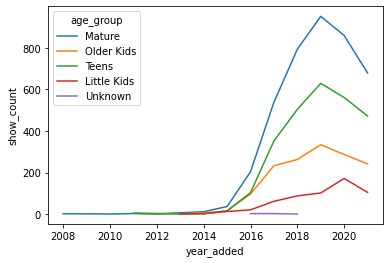

In [160]:
sns.lineplot(data = df_content_insight_age, x = 'year_added', y = 'show_count', hue='age_group')

In [161]:
df_content_insight_type = df_netflix_dataset.groupby(['year_added', 'type']).agg(show_count = ('show_id', 'count')).reset_index()
df_content_insight_type.head()

,year_added,type,show_count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13


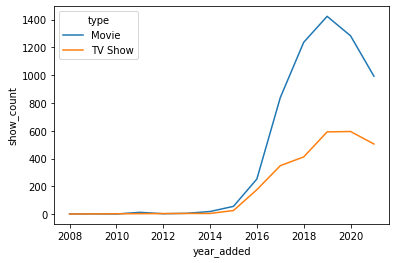

In [163]:
sns.lineplot(data = df_content_insight_type, x = 'year_added', y = 'show_count', hue='type');

In [164]:
df_content_insight_type = df_netflix_dataset.groupby(['year_added', 'type', 'age_group']).agg(show_count = ('show_id', 'count')).reset_index()
df_content_insight_type.head()

,year_added,type,age_group,show_count
0,2008.0,Movie,Mature,1
1,2008.0,TV Show,Mature,1
2,2009.0,Movie,Mature,2
3,2010.0,Movie,Mature,1
4,2011.0,Movie,Mature,3


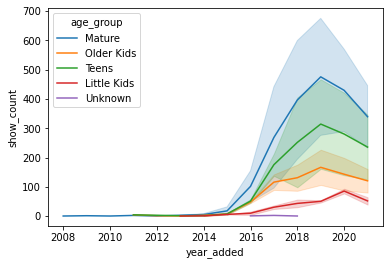

In [167]:
sns.lineplot(data = df_content_insight_type, x = 'year_added', y = 'show_count', hue='age_group');

In [168]:
df_content_insight_type_age = df_netflix_dataset.groupby(['type', 'age_group']).agg(show_count = ('show_id', 'count')).reset_index()
df_content_insight_type_age.head()

,type,age_group,show_count
0,Movie,Little Kids,298
1,Movie,Mature,2940
2,Movie,Older Kids,971
3,Movie,Teens,1917
4,Movie,Unknown,5


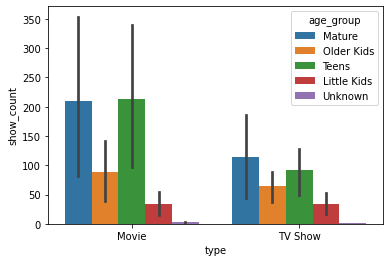

In [169]:
sns.barplot(data = df_content_insight_type, x = 'type', y = 'show_count', hue='age_group');

#### Observation
1. From 2017 onwards we see growth in the content library of the Netflix
2. Movie types are added more in comparison to the TV Shows
3. Mature content, followed by Teens content, followed by Older Kids and followed by Little kids, we see rise in content library for these.
4. For little kids we see that both Movie and TV show exists almost equal (they are not primary audience of Netflix)
5. Teens and Mature are primary user age group we see as the target audience and we see both TV shows and Movie in almost equal proportions for these use groups
6. Both Teens and Mature audience seems to be interested in Movies in comparison to the TV show
7. Older kids are also secondary audience and seems to be interested in both Movies and TV shows almost equally.

#### Let's analyse the directors popularity (for this we'll use the combined unnested dataframes)

In [181]:
df_directors_unnest.head()

,show_id,director
0,s1,Kirsten Johnson
2,s3,Julien Leclercq
5,s6,Mike Flanagan
6,s7,Robert Cullen
7,s7,José Luis Ucha


In [177]:
df_directors_unnest.describe(include='all')

,show_id,director
count,6978,6978
unique,6173,4993
top,s5888,Rajiv Chilaka
freq,13,22


In [179]:
df_combined_netflix['date_added_dt'] = pd.to_datetime(df_combined_netflix['date_added'].str.strip(), format='%B %d, %Y')

In [182]:
df_combined_netflix['year_added'] = df_combined_netflix['date_added_dt'].dt.year
df_combined_netflix.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in,age_group,date_added_dt,year_added
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries,Teens,2021-09-25,2021.0
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,International TV Shows,Mature,2021-09-24,2021.0
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Dramas,Mature,2021-09-24,2021.0
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Mysteries,Mature,2021-09-24,2021.0
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,International TV Shows,Mature,2021-09-24,2021.0


In [233]:
df_popular_directors = df_combined_netflix.groupby(['director', 'year_added', 'type', 'age_group']).agg(show_count = ('show_id', 'nunique')).reset_index()

In [234]:
df_popular_directors = df_popular_directors.sort_values(by='show_count', ascending=False)

In [235]:
df_popular_directors [ df_popular_directors ['type'] == 'TV Show' ]

,director,year_added,type,age_group,show_count
5496,Stan Lathan,2017.0,TV Show,Mature,2
2177,Hsu Fu-chun,2021.0,TV Show,Teens,2
2600,Joe Berlinger,2021.0,TV Show,Mature,2
5378,Shin Won-ho,2019.0,TV Show,Mature,2
4215,Nopparoj Chotmunkongsit,2020.0,TV Show,Mature,1
...,...,...,...,...,...
2141,Hernán Guerschuny,2020.0,TV Show,Mature,1
2151,Hikaru Toda,2021.0,TV Show,Older Kids,1
2169,Houda Benyamina,2020.0,TV Show,Mature,1
2166,Hong Won-ki,2020.0,TV Show,Mature,1


In [236]:
df_popular_directors [ df_popular_directors ['type'] == 'Movie' ]

,director,year_added,type,age_group,show_count
4681,Rajiv Chilaka,2021.0,Movie,Older Kids,17
5630,Suhas Kadav,2021.0,Movie,Older Kids,12
4756,Raúl Campos,2018.0,Movie,Mature,11
2368,Jan Suter,2018.0,Movie,Mature,11
2424,Jay Chapman,2017.0,Movie,Mature,7
...,...,...,...,...,...
2157,Hirotsugu Kawasaki,2021.0,Movie,Older Kids,1
2156,Hiroshi Yamazaki,2017.0,Movie,Teens,1
2155,Hiroshi Katagiri,2018.0,Movie,Mature,1
2154,Hiroshi Aoyama,2019.0,Movie,Older Kids,1


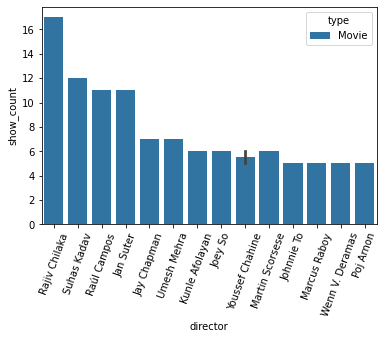

In [249]:
sns.barplot(data = df_popular_directors[:15], x = 'director', y = 'show_count', hue='type')
plt.xticks(rotation=70)
plt.show()

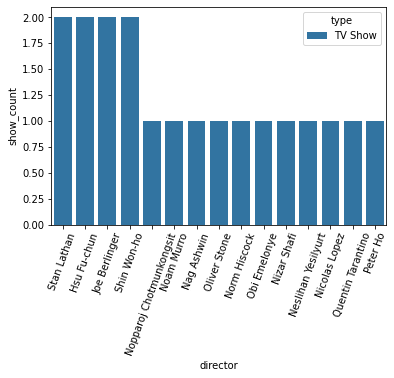

In [250]:
sns.barplot(data = df_popular_directors [ df_popular_directors ['type'] == 'TV Show' ][:15], x = 'director', y = 'show_count', hue='type')
plt.xticks(rotation=70)
plt.show()

In [237]:
df_popular_directors [ df_popular_directors['director'].isin(df_popular_directors['director'][:10]) ].sort_values(by='director')

,director,year_added,type,age_group,show_count
2369,Jan Suter,2018.0,Movie,Teens,1
2368,Jan Suter,2018.0,Movie,Mature,11
2367,Jan Suter,2017.0,Movie,Mature,5
2366,Jan Suter,2016.0,Movie,Mature,4
2423,Jay Chapman,2016.0,Movie,Teens,1
2425,Jay Chapman,2018.0,Movie,Mature,1
2424,Jay Chapman,2017.0,Movie,Mature,7
2426,Jay Chapman,2019.0,Movie,Mature,2
2422,Jay Chapman,2013.0,Movie,Mature,1
2635,Joey So,2020.0,Movie,Little Kids,6


In [242]:
df_popular_directors [ df_popular_directors ['type'] == 'Movie' ].sort_values(by=['show_count', 'year_added'], ascending=False).head(15)

,director,year_added,type,age_group,show_count
4681,Rajiv Chilaka,2021.0,Movie,Older Kids,17
5630,Suhas Kadav,2021.0,Movie,Older Kids,12
4756,Raúl Campos,2018.0,Movie,Mature,11
2368,Jan Suter,2018.0,Movie,Mature,11
2424,Jay Chapman,2017.0,Movie,Mature,7
5980,Umesh Mehra,2017.0,Movie,Teens,7
2635,Joey So,2020.0,Movie,Little Kids,6
6231,Youssef Chahine,2020.0,Movie,Mature,6
3191,Kunle Afolayan,2019.0,Movie,Teens,6
3669,Martin Scorsese,2019.0,Movie,Mature,6


In [243]:
df_popular_directors [ df_popular_directors ['type'] == 'TV Show' ].sort_values(by=['show_count', 'year_added'], ascending=False).head(15)

,director,year_added,type,age_group,show_count
2177,Hsu Fu-chun,2021.0,TV Show,Teens,2
2600,Joe Berlinger,2021.0,TV Show,Mature,2
5378,Shin Won-ho,2019.0,TV Show,Mature,2
5496,Stan Lathan,2017.0,TV Show,Mature,2
4064,Nag Ashwin,2021.0,TV Show,Mature,1
4166,Nicolas Lopez,2021.0,TV Show,Mature,1
4602,Priyadarshan,2021.0,TV Show,Mature,1
4277,Olivier Megaton,2021.0,TV Show,Teens,1
4297,Oriol Paulo,2021.0,TV Show,Mature,1
4382,Pass Patthanakumjon,2021.0,TV Show,Mature,1


**Observation about Popularity of directors per Age group and Year**
1. For the Mature Movie content which is one of the primary focus audience we should tie up with Raúl Campos, Jan Suter, Jay Chapman, Youssef Chahine, Martin Scorsese (Based both on number of shows and years active)
2. For the Mature TV Show content which is our primary content as well, we should collaborate with Joe Berlinger, Shin Won-ho, Stan Lathan, Nag Ashwin, Nicolas Lopez and other Mature content directors listed above.
3. For the Teen Movie content which is our second focus audience we should tie up with Umesh Mehra, Kunle Afolayan, Hidenori Inoue, Youssef Chahine, Wenn V. Deramas and Johnnie To
4. For the Teen TV Show content we should collaborate with Olivier Megaton, Maite Ruiz De Austri.
5. The reason being they have been consistently delivering popular content across past 5 years

#### Let's compare the Most popular cast

In [253]:
df_popular_cast = df_combined_netflix.groupby(['cast', 'year_added', 'type', 'age_group']).agg(show_count = ('show_id', 'nunique')).reset_index()
df_popular_cast = df_popular_cast.sort_values(by='show_count', ascending=False)

In [260]:
df_popular_cast_movie = df_popular_cast [ df_popular_cast ['type'] == 'Movie' ]
df_popular_cast_movie.head()

,cast,year_added,type,age_group,show_count
26387,Julie Tejwani,2021.0,Movie,Older Kids,18
45666,Rupa Bhimani,2021.0,Movie,Older Kids,18
43027,Rajesh Kava,2021.0,Movie,Older Kids,18
23913,Jigna Bhardwaj,2021.0,Movie,Older Kids,17
54198,Vatsal Dubey,2021.0,Movie,Older Kids,16


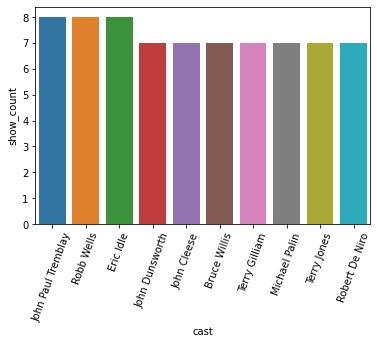

In [265]:
sns.barplot(data = df_popular_cast_movie [ df_popular_cast_movie ['age_group'] == 'Mature' ][:10], x = 'cast', y = 'show_count')
plt.xticks(rotation=70)
plt.show()

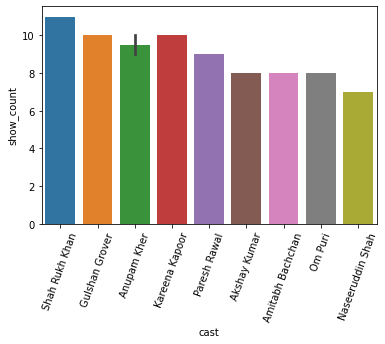

In [266]:
sns.barplot(data = df_popular_cast_movie [ df_popular_cast_movie ['age_group'] == 'Teens' ][:10], x = 'cast', y = 'show_count')
plt.xticks(rotation=70)
plt.show()

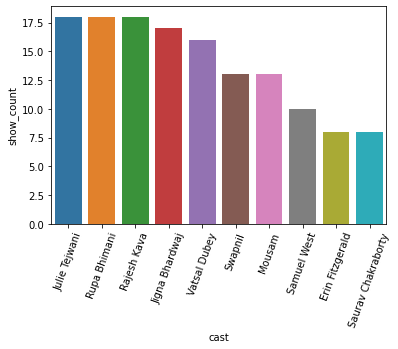

In [267]:
sns.barplot(data = df_popular_cast_movie [ df_popular_cast_movie ['age_group'] == 'Older Kids' ][:10], x = 'cast', y = 'show_count')
plt.xticks(rotation=70)
plt.show()

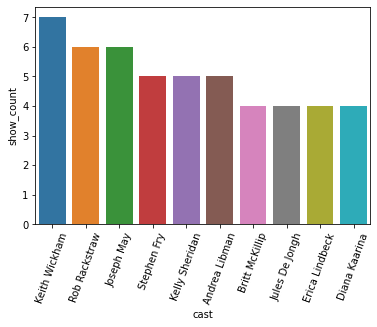

In [271]:
sns.barplot(data = df_popular_cast_movie [ df_popular_cast_movie ['age_group'] == 'Little Kids' ][:10], x = 'cast', y = 'show_count')
plt.xticks(rotation=70)
plt.show()

**Observation**
1. The most popular actors per age groups are plotted above
2. Per age group we should focus on these popular casts and get more contents on the Netflix

#### Let's analyse the best duration

In [272]:
df_netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature,2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature,2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature,2021-09-24,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature,2021-09-24,2021.0


In [279]:
df_netflix_dataset_movies = df_netflix_dataset [ df_netflix_dataset['type'] == 'Movie' ]
df_netflix_dataset_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,2021-09-25,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,2021-09-24,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Mature,2021-09-24,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens,2021-09-24,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Mature,2021-09-23,2021.0


In [286]:
df_netflix_dataset_movies['duration_mins'] = list(df_netflix_dataset_movies['duration'].str.replace(' min', ''))
df_netflix_dataset_movies['duration_mins'] = df_netflix_dataset_movies['duration_mins'].astype(float)
df_netflix_dataset_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added,duration_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,2021-09-25,2021.0,90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,2021-09-24,2021.0,91.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Mature,2021-09-24,2021.0,125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens,2021-09-24,2021.0,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Mature,2021-09-23,2021.0,127.0


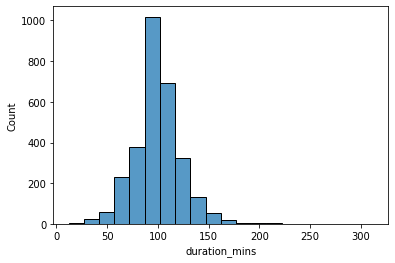

In [292]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Mature' ], x = 'duration_mins', bins=20);

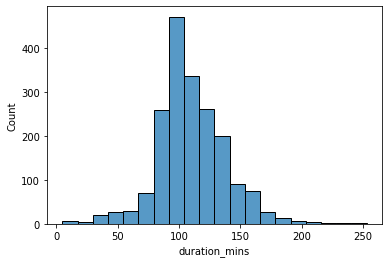

In [293]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Teens' ], x = 'duration_mins', bins=20);

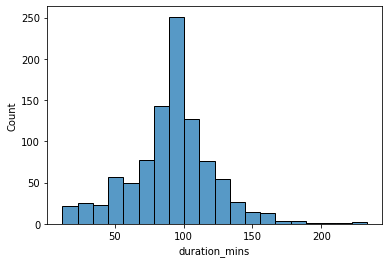

In [294]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Older Kids' ], x = 'duration_mins', bins=20);

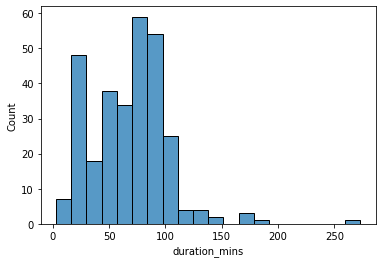

In [295]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Little Kids' ], x = 'duration_mins', bins=20);

**Observation**
1. The ideal duration for Movies for almost audience group is <100 mins
2. Teens can view movies duration >100 mins as compared to Mature audience
3. Older kids seems to watct movies in range of 70-120 mins
4. Little kids seems interested in multiple shows ranges like 30 mins, 1 hr and 1.5 hrs.

In [297]:
df_netflix_dataset_tv_show = df_netflix_dataset [ df_netflix_dataset['type'] == 'TV Show' ]
df_netflix_dataset_tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature,2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature,2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature,2021-09-24,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature,2021-09-24,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Mature,2021-09-24,2021.0


In [317]:
df_correct = df_netflix_dataset_tv_show['duration'].str.replace(' Seasons', '')
df_netflix_dataset_tv_show['duration_mins'] = df_correct.str.replace(' Season', '')
df_netflix_dataset_tv_show['duration_mins'] = df_netflix_dataset_tv_show['duration_mins'].astype(float)
df_netflix_dataset_tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added,duration_mins
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature,2021-09-24,2021.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature,2021-09-24,2021.0,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature,2021-09-24,2021.0,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature,2021-09-24,2021.0,2.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Mature,2021-09-24,2021.0,1.0


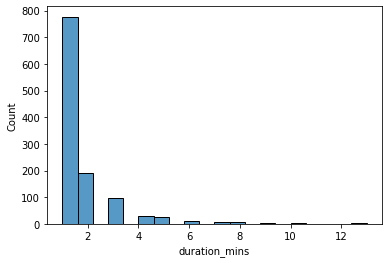

In [318]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Mature' ], x = 'duration_mins', bins=20);

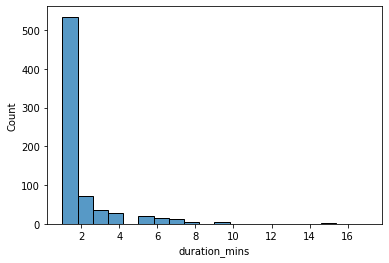

In [319]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Teens' ], x = 'duration_mins', bins=20);

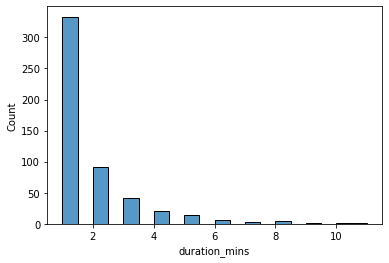

In [320]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Older Kids' ], x = 'duration_mins', bins=20);

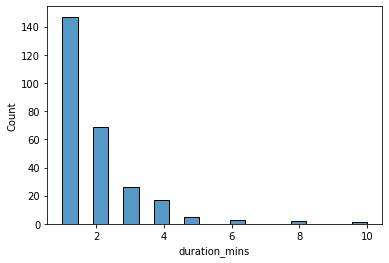

In [321]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Little Kids' ], x = 'duration_mins', bins=20);

**Observation**
1. The ideal number of seasons for TV Show duration of Mature audience is 1 Season and at max 2 Seasons.
2. The ideal number of seasons for TV Show duration of Teens audience is 1 Season
3. The ideal number of Seasons for TV Shows for Older and Little kids are 1 or 2 Seasons

#### Let's analyse the best time to launch TV Show/Movie

In [322]:
df_netflix_dataset_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added,duration_mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,2021-09-25,2021.0,90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,2021-09-24,2021.0,91.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Mature,2021-09-24,2021.0,125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens,2021-09-24,2021.0,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Mature,2021-09-23,2021.0,127.0


In [325]:
df_netflix_dataset_movies ['dt_month'] = df_netflix_dataset_movies['date_added_dt'].dt.month
df_netflix_dataset_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added,duration_mins,dt_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,2021-09-25,2021.0,90.0,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,2021-09-24,2021.0,91.0,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Mature,2021-09-24,2021.0,125.0,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Teens,2021-09-24,2021.0,104.0,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Mature,2021-09-23,2021.0,127.0,9


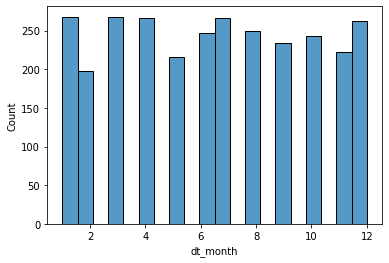

In [335]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Mature' ], x = 'dt_month', bins=20);

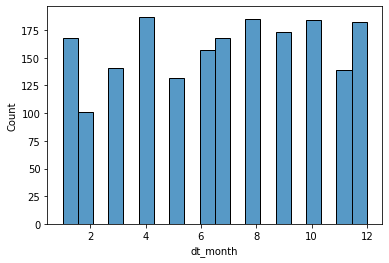

In [337]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Teens' ], x = 'dt_month', bins=20);

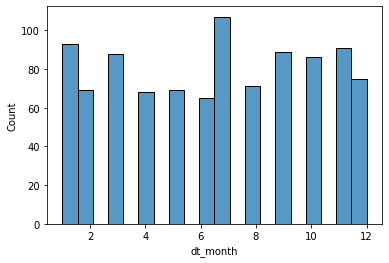

In [338]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Older Kids' ], x = 'dt_month', bins=20);

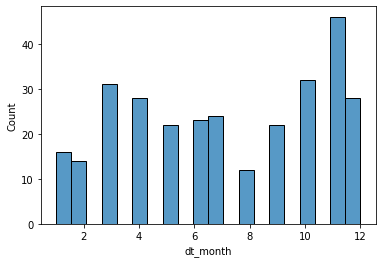

In [339]:
sns.histplot(data=df_netflix_dataset_movies [ df_netflix_dataset_movies['age_group'] == 'Little Kids' ], x = 'dt_month', bins=20);

**Observation**
1. The best time to launch movies for Mature and Teen audience is starting January almost every 2 months.
2. The best time to launch movies for Older Kids is June/July or November/December.
3. The best time to launch movies for Little Kids is November/December

In [327]:
df_netflix_dataset_tv_show ['dt_month'] = df_netflix_dataset_tv_show['date_added_dt'].dt.month
df_netflix_dataset_tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,date_added_dt,year_added,duration_mins,dt_month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mature,2021-09-24,2021.0,2.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Mature,2021-09-24,2021.0,1.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Mature,2021-09-24,2021.0,1.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mature,2021-09-24,2021.0,2.0,9.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Mature,2021-09-24,2021.0,1.0,9.0


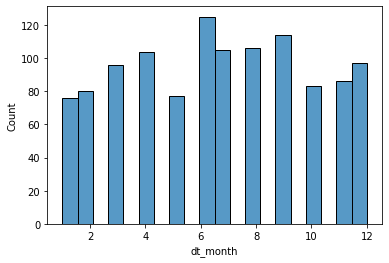

In [328]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Mature' ], x = 'dt_month', bins=20);

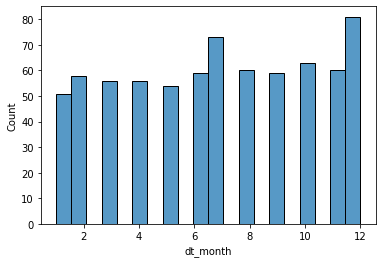

In [329]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Teens' ], x = 'dt_month', bins=20);

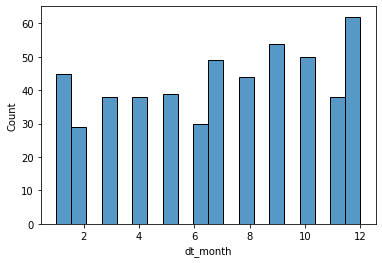

In [330]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Older Kids' ], x = 'dt_month', bins=20);

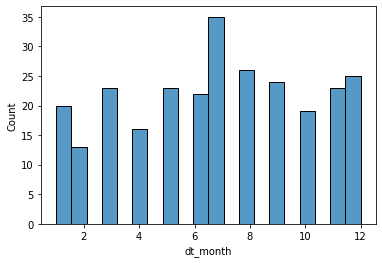

In [331]:
sns.histplot(data=df_netflix_dataset_tv_show [ df_netflix_dataset_tv_show['age_group'] == 'Little Kids' ], x = 'dt_month', bins=20);

**Observations**
1. The best month to release TV shows for Mature audience is June/July where we see 120 show releases.
2. The best month to release TV shows for Teens audience is June/July and November/December where we see >70 show releases.
3. The best month to release TV shows for Older Kids audience is November/December where we see >60 show releases.
4. The best month to release TV shows for Little Kids audience is June/July where we see >30 show releases.

#### Let's analyse the Top geographies

In [334]:
df_combined_netflix['country'].value_counts(normalize=True)

United States     0.312209
India             0.120014
United Kingdom    0.068098
Japan             0.045656
France            0.043421
                    ...   
Palestine         0.000011
Kazakhstan        0.000005
Nicaragua         0.000005
United States,    0.000005
Uganda            0.000005
Name: country, Length: 127, dtype: float64

**Observations**
1. It seems the most popular geography is united states with 30% content
2. The second most important geography is India with 12% content